In [1]:
#all imports
import networkx as nx
import matplotlib.pyplot as plt
import random 
from string import ascii_lowercase
import numpy as np
import time
import math
import datetime
from bokeh.models import CustomJS, Slider, Button
from bokeh.layouts import row, column
from bokeh.plotting import show
from bokeh.io import output_notebook
from datetime import timedelta, date
import warnings
warnings.simplefilter('ignore')

In [2]:
output_notebook()
#city class struct
class City:
    def __init__(self,identifiant, x, y,name):
        self.identifiant = identifiant
        self.x = x
        self.y = y
        self.name = name
    
    def showDatas(self):
        return print('City :',self.name,' id:',self.identifiant,'; X:',self.x,'; Y:',self.y)
        
#road class struct
class Road:
    def __init__(self,identifiant, city_1, city_2):
        self.identifiant = identifiant
        self.city_1 = city_1
        self.city_2 = city_2
#         self.trafics = trafics
        
    def showDatas(self):
        print('Route : id:',self.identifiant,'; Ville 1:',self.city_1,'; Ville 2:',self.city_2)

        
class Trafic:
    def __init__(self,identifiant , date, nbr_vehicles):
        self.identifiant = identifiant
        self.date = date
        self.nbr_vehicles = nbr_vehicles
        
    def showDatas(self):
        print('Trafic :',self.identifiant,' id route:',self.id_road,'; date:',self.date,'; Nbr véhicules:',self.nbr_vehicles)

# class PathManager:
    
        
# class Path:
#     def __init__(self, generator, path=None):
#         self.generator = generator
#         self.path = []
#         self.fitness = 0.0
#         self.distance = 0
#         if path is not None:
#             self.path = path
#         else:
#             for i in range(0, self.generator.nbrCities()):
#                 self.path.append(None)
                
#     def __len__(self):
#           return len(self.path)
        
#     def getCity(self, index):
#          return self.path[index]

#     def setCity(self, index, city):
#         self.path[index] = city
#         self.fitness = 0.0
#         self.distance = 0
        
#     def getFitness(self):
#         if self.fitness == 0:
#             self.fitness = 1/float(self.getDistance())
#         return self.fitnes
    
#     def getDistance(self):
#         if self.distance == 0:
#             pathDistance = 0
#             for indexCity in range(0, len(self)):
#                 start = self.getCity(indexCity)
#                 end = None
#                 if indexCity+1 < len(self):
#                     end = self.getCity(indexCity+1)
#                 else:
#                     end = self.getCity(0)
#                 pathDistance += start.distance(end)
#             self.distance = pathDistance
#         return self.distance

# class TSP:
#     def __init__(self, gestionnaireCircuit):
#         self.gestionnaireCircuit = gestionnaireCircuit
#         self.tauxMutation = 0.015
#         self.tailleTournoi = 5
#         self.elitisme = True


# class Generator:
#     cities = []
    
#     def addCity(self, city):
#         self.cities.append(city)

#     def getCity(self, index):
#         return self.cities[index]

#     def nbrCities(self):
#           return len(self.cities)
    
    
#to reload cities name file txt
def reloadCitiesName():
    citiesName = []
    try:
        with open('FrenchCitieslist.txt', 'rU') as infile:
            wordSet = set(line.strip() for line in infile)
    except IOError:
           print('error opening file')

    for aWord in wordSet:
        citiesName.append(aWord)
    return citiesName

#calculate distance between two points
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist  

# def getCity(self, index):
#       return self.cities[index]
    
#sanitize too close cities
def getCityCoords(x,y):
    minDist = minDistBetweenCities
    maxIterations = 2000
    currentIteration = 0
    i = 0
    
    while i < len(cities):
        if currentIteration <= maxIterations:
            currentIteration += 1
        else:
            minDist = minDist - minDist / 100 #Exemple of temporal complexity reduction
            
        if calculateDistance(x,y,cities[i].x,cities[i].y) <= minDist:
            random.seed(time.clock())
            x,y = (random.randint(minX,maxX),random.randint(minY,maxY))
            i = 0
        else:
            i += 1
    return(x,y)


def isCityBusy(nextCity, road):
    return (nextCity == road.city_1) or (nextCity == road.city_2)

def getRoad(currentCity):
    print("LEN: ", len(cities))
    if len(cities)>1:
        selection = random.randint(1, len(cities)-1)
        nextCity = cities.pop(selection)
        nextCity.showDatas()
    else:
        nextCity = cities[0]          
    return(currentCity,nextCity)

def generateGraph():

    #Generate cities and associated nodes
    for i in range(nbr_cities+1):
        selection = random.randint(0, len(citiesName)-1)
        name = citiesName.pop(selection)
        #position
        x,y = getCityCoords(random.randint(minX,maxX),random.randint(minY,maxY))
        city = City(i,x,y,name)
        cities.append(city)
        G.add_node(i,pos=(x,y))
        labels[i] = city.name
    

    citiesTemp = cities[:]

    currentCity = cities[0]
    for i in range(len(cities)+1):
        currentCity,nextCity = getRoad(currentCity);
        roads.append(Road(i,currentCity,nextCity))
        print("Start: ", currentCity.identifiant, "; end: ", nextCity.identifiant)
        G.add_edge(currentCity.identifiant,nextCity.identifiant)    
        currentCity = nextCity

    #Draw Graph
    plt.figure(figsize=(15, 15))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(minX,maxX)
    plt.ylim(minY,maxY)
    plt.title("Carte routière")
    ax = plt.subplot(1,1,1)
    pos = nx.get_node_attributes(G,'pos')

    #TODO : need to implement dynamic scale of node size for big amount of cities, same for roads
    nx.draw_networkx(G,pos,node_size=1000,node_color="skyblue", alpha=0.5,node_shape="s", linewidths=30, ax =ax)
    nx.draw_networkx_labels(G, pos, labels, font_size=16,font_weight='bold')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
    plt.show()

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



LEN:  15
City : Le Mans  id: 10 ; X: 8336 ; Y: -7290
Start:  0 ; end:  10
LEN:  14
City : Cherbourg  id: 8 ; X: -1099 ; Y: -6893
Start:  10 ; end:  8
LEN:  13
City : Besancon  id: 7 ; X: 10000 ; Y: -1654
Start:  8 ; end:  7
LEN:  12
City : Nimes  id: 1 ; X: 2086 ; Y: 9890
Start:  7 ; end:  1
LEN:  11
City : Nevers  id: 5 ; X: 2823 ; Y: 2754
Start:  1 ; end:  5
LEN:  10
City : Auxerre  id: 2 ; X: 3474 ; Y: -8308
Start:  5 ; end:  2
LEN:  9
City : La Rochelle  id: 11 ; X: -7102 ; Y: 8950
Start:  2 ; end:  11
LEN:  8
City : Mulhouse  id: 12 ; X: -4994 ; Y: -1058
Start:  11 ; end:  12
LEN:  7
City : Lille  id: 9 ; X: 4841 ; Y: -2109
Start:  12 ; end:  9
LEN:  6
City : Beziers  id: 13 ; X: 5722 ; Y: 5860
Start:  9 ; end:  13
LEN:  5
City : Orleans  id: 4 ; X: -4519 ; Y: 4250
Start:  13 ; end:  4
LEN:  4
City : Strasbourg  id: 6 ; X: -8429 ; Y: 1385
Start:  4 ; end:  6
LEN:  3
City : Montpellier  id: 14 ; X: -9390 ; Y: -2536
Start:  6 ; end:  14
LEN:  2
City : Nancy  id: 3 ; X: -9835 ; Y: -7

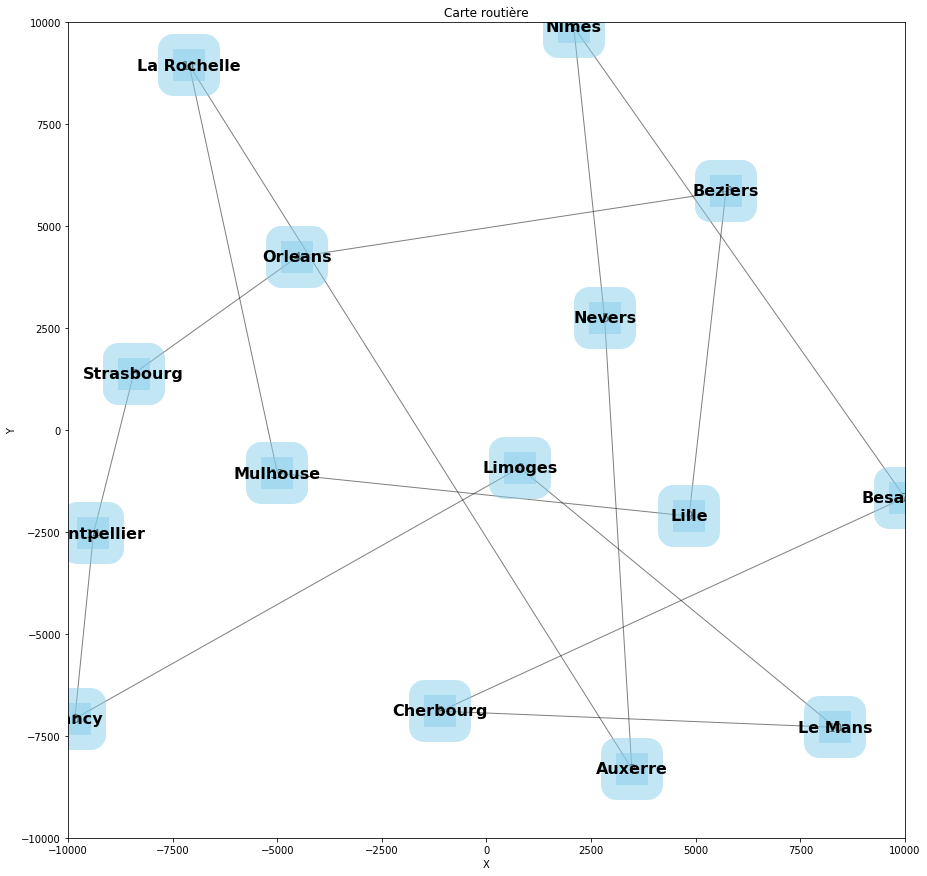

Time of Execution :
Wall time: 800 ms


In [4]:
%%time 

#magic execution time

def change_click():
    generateGraph()

cities_slider = Slider(start=1, end=100, value=1, step=1, title="Nombre de villes")
roads_slider = Slider(start=1, end=500, value=1, step=.1, title="Nombre de routes")
maxX_slider = Slider(start=0, end=10000, value=5000, step=100, title="MaxX")
minX_slider = Slider(start=-10000, end=0, value=-5000, step=100, title="MinX")
maxY_slider = Slider(start=0, end=10000, value=5000, step=100, title="MaxY")
minY_slider = Slider(start=-10000, end=0, value=-5000, step=100, title="MinY")
bt = Button(label='Generate')

bt.on_click(change_click)


layout = row(
    column(cities_slider, roads_slider, maxX_slider, minX_slider,maxY_slider,minY_slider),bt
)

nbr_cities = 15;
nbr_roads = 200;
nbr_trafic_record = 5000;

startDate = datetime.datetime(2020,1,1, 7, 0)
endDate = datetime.datetime(2020,1, 5, 19, 0)

#Not absolute if too long time execution, it's a preferred dist, reducing by 1% each iterations after 5000 iterations
minDistBetweenCities = 4000; 

#range
maxX = 10000;
maxY = 10000;
minX = -10000;
minY = -10000;
cities = []
citiesTemp = []
roads = []
labels = {}
G = nx.Graph()
nbr_cities = nbr_cities-1 #to fix fucked up bug of NetworkX
citiesName = reloadCitiesName()


show(layout)

generateGraph()


print("Time of Execution :") #don't delete, using magic cell statement